<a href="https://colab.research.google.com/github/emiliomercuri/FundEngAmb2025/blob/main/aulas/aula15_EvapotranspMODIS%2BPrecCHIRPS/1_Evapotranspirac%CC%A7a%CC%83o_MODIS_Purus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook para tratar os dados de Evapotrapiração do produto MODIS/NASA



# Working with Evapotranspiration Data from MODIS (TERRA satellite)

MODIS is a sensor in TERRA satellite, MODIS means Moderate-Resolution Imaging Spectroradiometer.
We have downloaded the data from the Appeears platform:
https://appeears.earthdatacloud.nasa.gov/

* Data comes from 4 different regions of the world:
  * Ahja river basin, located near Tartu in Estonia (Hemi-Boreal Forest)
  * Nhundiaquara river basin, located at the Paraná state in the south of Brazil (Atlantic Rain Forest)
  * Hari river basin (Afghan-India Friendship Dam (AIFD), formerly Salma Dam) in Herat Province of western Afghanistan (Dry climate vegetation)
 * Purus river basin (Amazon Forest, between Acre and Amazon States) (Amazon Forest vegetation)
* Convert the data from (mm/8day) to (mm/day)
* Resample data to monthly or yearly time steps
* Visualize and compare data from different regions

In [1]:
import pandas as pd
import numpy
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta

# Import the 3 CSV Files from GitHub to Colab folder

Link for the files: https://github.com/emiliomercuri/hidrologia

Go to folder "Evapotranspiration Data", and download:

* Ahja-MOD16A2GF-006-Statistics.csv
* Nhundiaquara-MOD16A2GF-006-Statistics.csv
* Salma-MOD16A2GF-006-Statistics.csv

In [2]:
!gdown 1WG-gBYnDxTq__9-rGcd63hgFvGkeb6Ei
!gdown 1BjwOh17IomYDJTGgjCHggmOb4yQBZy6e
!gdown 10ju2aSTgWHJY0_Pb7D6O67Bad8-kyeq3
!gdown 1h9reXw3Pv8i0iOLb5EU8qu54oGeoTuaR

Downloading...
From: https://drive.google.com/uc?id=1WG-gBYnDxTq__9-rGcd63hgFvGkeb6Ei
To: /content/Ahja-MOD16A2GF-006-Statistics.csv
100% 305k/305k [00:00<00:00, 121MB/s]
Downloading...
From: https://drive.google.com/uc?id=1BjwOh17IomYDJTGgjCHggmOb4yQBZy6e
To: /content/Nhundiaquara-MOD16A2GF-006-Statistics.csv
100% 316k/316k [00:00<00:00, 124MB/s]
Downloading...
From: https://drive.google.com/uc?id=10ju2aSTgWHJY0_Pb7D6O67Bad8-kyeq3
To: /content/Salma-MOD16A2GF-006-Statistics.csv
100% 294k/294k [00:00<00:00, 119MB/s]
Downloading...
From: https://drive.google.com/uc?id=1h9reXw3Pv8i0iOLb5EU8qu54oGeoTuaR
To: /content/Purus-MOD16A2GF-061-Statistics.csv
100% 311k/311k [00:00<00:00, 84.7MB/s]


## MODIS data (8 days accumulated)

Importing the 3 files into 3 DataFrames:

In [3]:
dateparse = lambda x: datetime.strptime(x, '%Y-%m-%d')
Ahja_ET_PET = pd.read_csv('https://raw.githubusercontent.com/emiliomercuri/hidrologia/main/evapotranspiration/data/Ahja-MOD16A2GF-006-Statistics.csv',
                          sep=',', index_col=[3], parse_dates=['Date'], date_parser=dateparse)
Ahja_ET_PET.index=pd.to_datetime(Ahja_ET_PET.index)

Nhundiaquara_ET_PET = pd.read_csv('https://raw.githubusercontent.com/emiliomercuri/hidrologia/main/evapotranspiration/data/Nhundiaquara-MOD16A2GF-006-Statistics.csv',
                                  sep=',', index_col=[3], parse_dates=['Date'], date_parser=dateparse)
Nhundiaquara_ET_PET.index=pd.to_datetime(Nhundiaquara_ET_PET.index)

Salma_ET_PET = pd.read_csv('https://raw.githubusercontent.com/emiliomercuri/hidrologia/main/evapotranspiration/data/Salma-MOD16A2GF-006-Statistics.csv',
                           sep=',', index_col=[3], parse_dates=['Date'], date_parser=dateparse)
Salma_ET_PET.index=pd.to_datetime(Salma_ET_PET.index)

Purus_ET_PET = pd.read_csv('Purus-MOD16A2GF-061-Statistics.csv',
                           sep=',', index_col=[3], parse_dates=['Date'], date_parser=dateparse)
Purus_ET_PET.index=pd.to_datetime(Purus_ET_PET.index)

Purus_ET_PET.tail(3)


<ipython-input-3-1adf9c286e0b>:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  Ahja_ET_PET = pd.read_csv('https://raw.githubusercontent.com/emiliomercuri/hidrologia/main/evapotranspiration/data/Ahja-MOD16A2GF-006-Statistics.csv',
<ipython-input-3-1adf9c286e0b>:6: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  Nhundiaquara_ET_PET = pd.read_csv('https://raw.githubusercontent.com/emiliomercuri/hidrologia/main/evapotranspiration/data/Nhundiaquara-MOD16A2GF-006-Statistics.csv',
<ipython-input-3-1adf9c286e0b>:10: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and the

,File Name,Dataset,aid,Count,Minimum,Maximum,Range,Mean,Standard Deviation,Variance,Upper Quartile,Upper 1.5 IQR,Median,Lower 1.5 IQR,Lower Quartile
Date,,,,,,,,,,,,,,,
2010-12-11,MOD16A2GF_061_PET_500m_doy2010345_aid0002,PET_500m,aid0002,1115069.0,23.0,64.1,"(23.0,64.1)",33.592006,3.173744,10.072651,35.4,41.2,33.2,25.7,31.5
2010-12-19,MOD16A2GF_061_PET_500m_doy2010353_aid0002,PET_500m,aid0002,1115069.0,20.3,61.1,"(20.3,61.1)",31.712659,2.855754,8.155333,33.0,37.0,31.8,26.3,30.3
2010-12-27,MOD16A2GF_061_PET_500m_doy2010361_aid0002,PET_500m,aid0002,1115069.0,13.8,38.6,"(13.8,38.6)",20.589649,1.642961,2.699322,21.5,24.2,20.7,17.0,19.7


## Create new DataFrames

Activities:

1. Print the Dataframe
2. Recognize that the column "Dataset" splits the data into ET and PET
3. Create 2 Dataframes containing data from 3 watersheds (one for ET and another for PET)

In [4]:
Ahja_ET_PET.query("Dataset == 'PET_500m'")

,File Name,Dataset,aid,Count,Minimum,Maximum,Range,Mean,Standard Deviation,Variance,Upper Quartile,Upper 1.5 IQR,Median,Lower 1.5 IQR,Lower Quartile
Date,,,,,,,,,,,,,,,
2000-01-01,MOD16A2GF_006_PET_500m_doy2000001_aid0001,PET_500m,aid0001,8382.0,-0.8,1.5,"(-0.8,1.5)",1.069709,0.363311,0.131995,1.3,1.5,1.2,0.3,0.9
2000-01-09,MOD16A2GF_006_PET_500m_doy2000009_aid0001,PET_500m,aid0001,8382.0,-0.6,1.6,"(-0.6,1.6)",1.230220,0.345882,0.119634,1.5,1.6,1.4,0.5,1.1
2000-01-17,MOD16A2GF_006_PET_500m_doy2000017_aid0001,PET_500m,aid0001,8382.0,-0.7,2.1,"(-0.7,2.1)",1.557540,0.444331,0.197430,1.9,2.1,1.7,0.4,1.3
2000-01-25,MOD16A2GF_006_PET_500m_doy2000025_aid0001,PET_500m,aid0001,8382.0,-0.8,2.0,"(-0.8,2.0)",1.495574,0.454132,0.206235,1.8,2.0,1.6,0.6,1.3
2000-02-02,MOD16A2GF_006_PET_500m_doy2000033_aid0001,PET_500m,aid0001,8382.0,0.1,1.6,"(0.1,1.6)",1.286388,0.169056,0.028580,1.4,1.6,1.3,0.9,1.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-25,MOD16A2GF_006_PET_500m_doy2021329_aid0001,PET_500m,aid0001,8386.0,0.6,2.6,"(0.6,2.6)",1.751359,0.222084,0.049321,1.9,2.2,1.8,1.4,1.7
2021-12-03,MOD16A2GF_006_PET_500m_doy2021337_aid0001,PET_500m,aid0001,8386.0,0.7,1.8,"(0.7,1.8)",1.595194,0.200398,0.040159,1.7,1.8,1.7,1.5,1.6
2021-12-11,MOD16A2GF_006_PET_500m_doy2021345_aid0001,PET_500m,aid0001,8386.0,0.5,2.0,"(0.5,2.0)",1.218829,0.158041,0.024977,1.3,1.4,1.3,1.1,1.2


In [5]:
Purus_ET_PET['Dataset'].unique()

array(['ET_500m', 'PET_500m'], dtype=object)

In [6]:
# Only PET data
Purus_ET_PET.query("Dataset == 'PET_500m'")

,File Name,Dataset,aid,Count,Minimum,Maximum,Range,Mean,Standard Deviation,Variance,Upper Quartile,Upper 1.5 IQR,Median,Lower 1.5 IQR,Lower Quartile
Date,,,,,,,,,,,,,,,
2000-01-01,MOD16A2GF_061_PET_500m_doy2000001_aid0001,PET_500m,aid0001,4.0,34.0,38.8,"(34.0,38.8)",36.050000,1.995620,3.982500,37.525,38.8,35.70,34.0,34.225
2000-01-09,MOD16A2GF_061_PET_500m_doy2000009_aid0001,PET_500m,aid0001,4.0,33.8,38.5,"(33.8,38.5)",35.825000,1.997968,3.991875,37.375,38.5,35.50,33.8,33.950
2000-01-17,MOD16A2GF_061_PET_500m_doy2000017_aid0001,PET_500m,aid0001,4.0,36.0,40.9,"(36.0,40.9)",38.100000,2.079663,4.325000,39.700,40.9,37.75,36.0,36.150
2000-01-25,MOD16A2GF_061_PET_500m_doy2000025_aid0001,PET_500m,aid0001,4.0,44.4,49.3,"(44.4,49.3)",46.450000,2.126617,4.522500,48.100,49.3,46.05,44.4,44.400
2000-02-02,MOD16A2GF_061_PET_500m_doy2000033_aid0001,PET_500m,aid0001,4.0,35.9,41.2,"(35.9,41.2)",38.100000,2.290196,5.245000,39.850,41.2,37.65,35.9,35.900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-11-25,MOD16A2GF_061_PET_500m_doy2010329_aid0002,PET_500m,aid0002,1115069.0,22.5,59.3,"(22.5,59.3)",32.952369,2.429737,5.903621,34.300,38.3,32.80,27.6,31.600
2010-12-03,MOD16A2GF_061_PET_500m_doy2010337_aid0002,PET_500m,aid0002,1115069.0,25.8,65.2,"(25.8,65.2)",37.771039,2.767128,7.656998,39.500,44.7,37.80,30.8,36.000
2010-12-11,MOD16A2GF_061_PET_500m_doy2010345_aid0002,PET_500m,aid0002,1115069.0,23.0,64.1,"(23.0,64.1)",33.592006,3.173744,10.072651,35.400,41.2,33.20,25.7,31.500


In [7]:
# Only ET data
Purus_ET_PET.query("Dataset == 'ET_500m'")

,File Name,Dataset,aid,Count,Minimum,Maximum,Range,Mean,Standard Deviation,Variance,Upper Quartile,Upper 1.5 IQR,Median,Lower 1.5 IQR,Lower Quartile
Date,,,,,,,,,,,,,,,
2000-01-01,MOD16A2GF_061_ET_500m_doy2000001_aid0001,ET_500m,aid0001,4.0,24.1,31.1,"(24.1,31.1)",26.975000,2.935451,8.616875,29.075,31.1,26.35,24.1,24.250
2000-01-09,MOD16A2GF_061_ET_500m_doy2000009_aid0001,ET_500m,aid0001,4.0,24.9,31.1,"(24.9,31.1)",27.425000,2.616653,6.846875,29.300,31.1,26.85,24.9,24.975
2000-01-17,MOD16A2GF_061_ET_500m_doy2000017_aid0001,ET_500m,aid0001,4.0,25.6,33.0,"(25.6,33.0)",28.650000,3.148412,9.912500,30.975,33.0,28.00,25.6,25.675
2000-01-25,MOD16A2GF_061_ET_500m_doy2000025_aid0001,ET_500m,aid0001,4.0,30.0,38.4,"(30.0,38.4)",33.475000,3.585649,12.856875,36.150,38.4,32.75,30.0,30.075
2000-02-02,MOD16A2GF_061_ET_500m_doy2000033_aid0001,ET_500m,aid0001,4.0,26.4,33.7,"(26.4,33.7)",29.350000,3.111672,9.682500,31.600,33.7,28.65,26.4,26.400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-11-25,MOD16A2GF_061_ET_500m_doy2010329_aid0002,ET_500m,aid0002,1115069.0,18.1,54.8,"(18.1,54.8)",27.394979,2.330405,5.430785,28.600,32.0,27.40,22.9,26.300
2010-12-03,MOD16A2GF_061_ET_500m_doy2010337_aid0002,ET_500m,aid0002,1115069.0,19.6,59.7,"(19.6,59.7)",30.673758,2.663094,7.092070,32.300,36.8,30.90,24.8,29.300
2010-12-11,MOD16A2GF_061_ET_500m_doy2010345_aid0002,ET_500m,aid0002,1115069.0,18.0,59.3,"(18.0,59.3)",27.624481,2.738994,7.502090,29.000,33.3,27.60,21.8,26.100


In [8]:
# Create empty DataFrames
modis_ET  = pd.DataFrame()
modis_PET = pd.DataFrame()

# Separates what is evapotranspiration from potential evapotranspiration

# Pick only the column "Mean"
modis_ET['Purus ET (mm/8day)'] = Purus_ET_PET.query("Dataset == 'ET_500m'")['Mean']
modis_ET['Hari ET (mm/8day)'] = Salma_ET_PET.query("Dataset == 'ET_500m'")['Mean']
modis_ET['Nhundiaquara ET (mm/8day)'] = Nhundiaquara_ET_PET.query("Dataset == 'ET_500m'")['Mean']
modis_ET['Ahja ET (mm/8day)'] = Ahja_ET_PET.query("Dataset == 'ET_500m'")['Mean']

modis_PET['Purus PET (mm/8day)'] = Purus_ET_PET.query("Dataset == 'PET_500m'")['Mean']
modis_PET['Hari PET (mm/8day)'] = Salma_ET_PET.query("Dataset == 'PET_500m'")['Mean']
modis_PET['Nhundiaquara PET (mm/8day)'] = Nhundiaquara_ET_PET.query("Dataset == 'PET_500m'")['Mean']
modis_PET['Ahja PET (mm/8day)'] = Ahja_ET_PET.query("Dataset == 'PET_500m'")['Mean']


In [12]:
modis_ET

,Purus ET (mm/8day),Hari ET (mm/8day),Nhundiaquara ET (mm/8day),Ahja ET (mm/8day)
Date,,,,
2000-01-01,26.975000,3.527832,25.474777,1.138762
2000-01-09,27.425000,6.268466,26.378906,1.287008
2000-01-17,28.650000,6.290238,29.151897,1.640933
2000-01-25,33.475000,7.560660,26.918471,1.583274
2000-02-02,29.350000,6.763781,28.636105,1.279886
...,...,...,...,...
2010-11-25,27.394979,0.931663,30.798326,1.630873
2010-12-03,30.673758,4.395982,31.692578,1.787813
2010-12-11,27.624481,2.856110,31.430078,1.878428


In [13]:
modis_PET

,Purus PET (mm/8day),Hari PET (mm/8day),Nhundiaquara PET (mm/8day),Ahja PET (mm/8day)
Date,,,,
2000-01-01,36.050000,26.503321,33.071931,1.069709
2000-01-09,35.825000,10.831318,33.600056,1.230220
2000-01-17,38.100000,8.601710,39.508650,1.557540
2000-01-25,46.450000,15.225252,36.349386,1.495574
2000-02-02,38.100000,13.947754,39.068694,1.286388
...,...,...,...,...
2010-11-25,32.952369,37.299478,42.070982,1.619079
2010-12-03,37.771039,26.739219,41.301842,1.769735
2010-12-11,33.592006,30.441029,40.969643,1.879514


In [19]:
modis_ET.index

DatetimeIndex(['2000-01-01', '2000-01-09', '2000-01-17', '2000-01-25',
               '2000-02-02', '2000-02-10', '2000-02-18', '2000-02-26',
               '2000-03-05', '2000-03-13',
               ...
               '2010-10-16', '2010-10-24', '2010-11-01', '2010-11-09',
               '2010-11-17', '2010-11-25', '2010-12-03', '2010-12-11',
               '2010-12-19', '2010-12-27'],
              dtype='datetime64[ns]', name='Date', length=1012, freq=None)

In [20]:
# View evapotranspiration data (8 accumulated days) (2015-2020)
modis_ET['2000-01-01':'2005-01-01'].plot(figsize=(15,4))

KeyError: 'Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is not allowed.'

<Axes: xlabel='Date'>

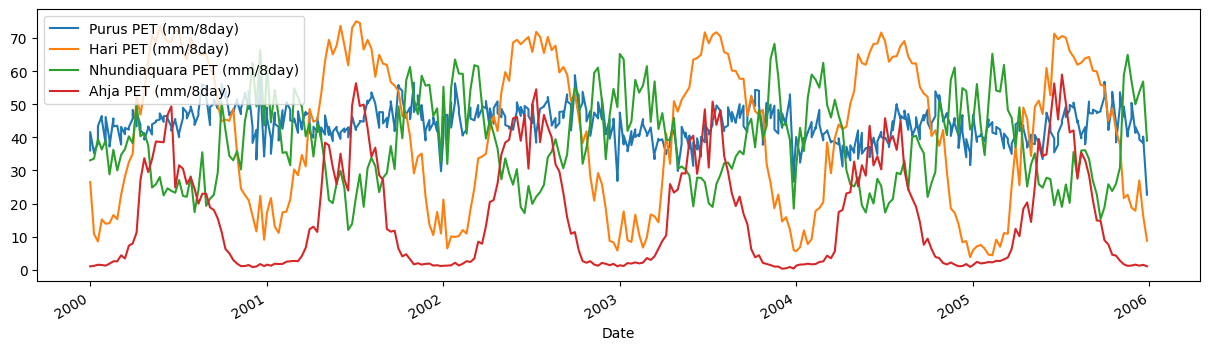

In [ ]:
# View potential evapotranspiration data (8 accumulated days) (2015-2020)
modis_PET['2000':'2005'].plot(figsize=(15,4))

<Axes: xlabel='Date'>

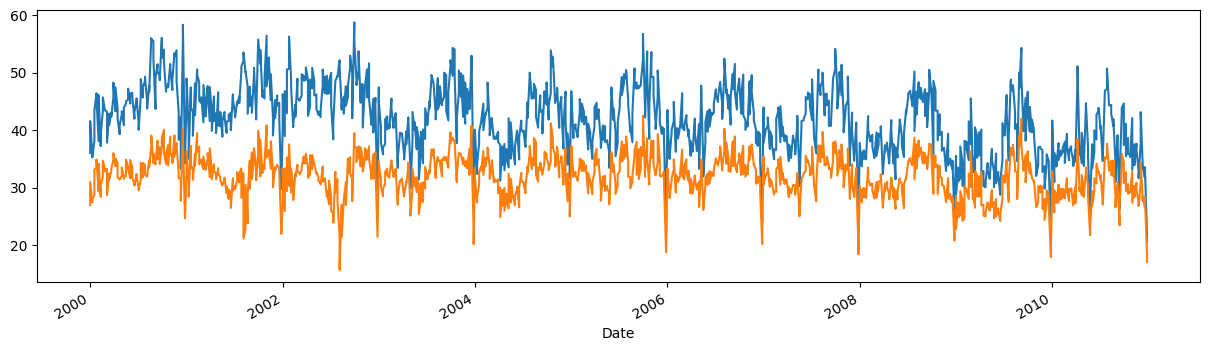

In [ ]:
# Purus
modis_PET['2000':'2010']['Purus PET (mm/8day)'].plot(figsize=(15,4))
modis_ET['2000':'2010']['Purus ET (mm/8day)'].plot(figsize=(15,4))

<Axes: xlabel='Date'>

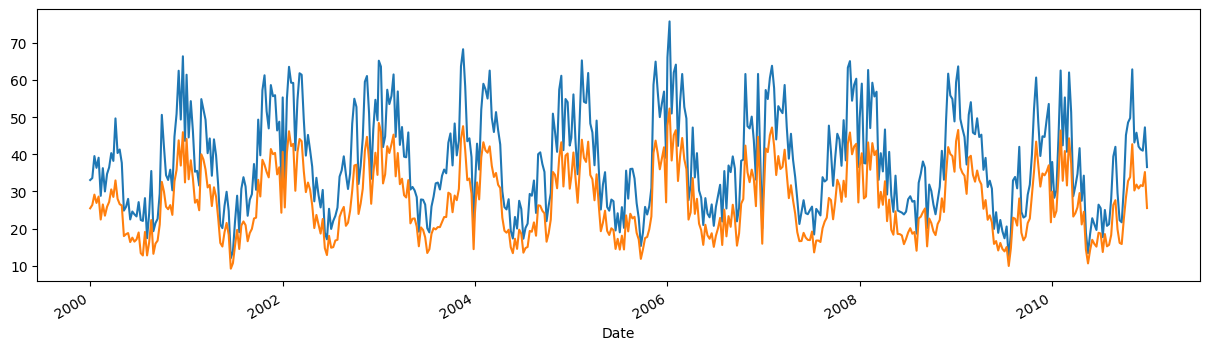

In [ ]:
# Nhundiaquara
modis_PET['2000':'2010']['Nhundiaquara PET (mm/8day)'].plot(figsize=(15,4))
modis_ET['2000':'2010']['Nhundiaquara ET (mm/8day)'].plot(figsize=(15,4))

<Axes: xlabel='Date'>

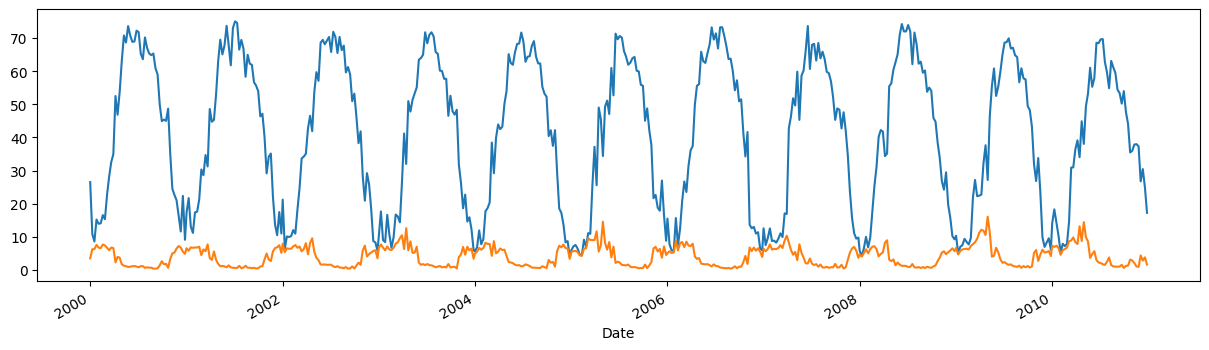

In [ ]:
# Hari
modis_PET['2000':'2010']['Hari PET (mm/8day)'].plot(figsize=(15,4))
modis_ET['2000':'2010']['Hari ET (mm/8day)'].plot(figsize=(15,4))

<Axes: xlabel='Date'>

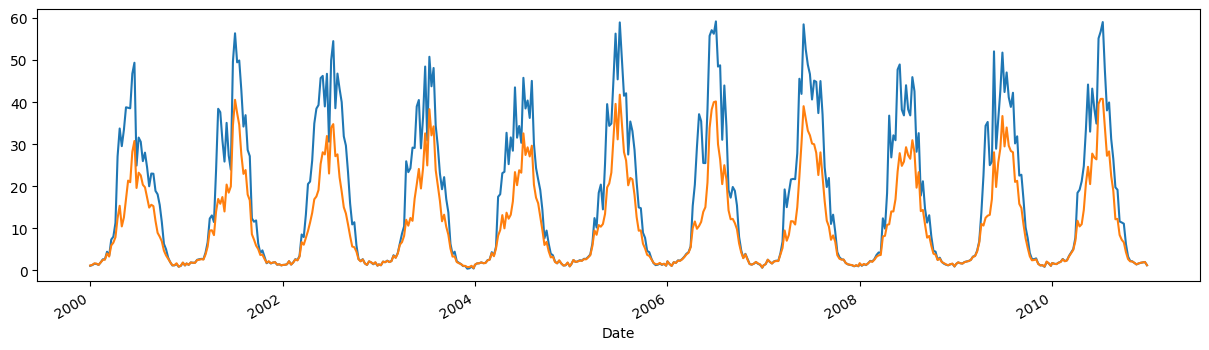

In [ ]:
# Ahja
modis_PET['2000':'2010']['Ahja PET (mm/8day)'].plot(figsize=(15,4))
modis_ET['2000':'2010']['Ahja ET (mm/8day)'].plot(figsize=(15,4))

## Daily Evapotranspiration

Conversion of 8-day accumulated data to daily data.

Activities:

1. Recognize that there is missing data
2. Search for methods to fill it
* Fill NA/NaN values using the specified method.
 * Sintax:
 ```python
 DataFrame.fillna(method=?)
 ```
 * Documentation: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html#pandas.DataFrame.fillna

*  ‘Forward filling’ or ‘padding’ — Use the last known value to fill the new one.
 * Sintax:
 ```python
 DataFrame.ffill() or DataFrame.pad()
 ```
 * https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.ffill.html


* ‘Backfilling’ — Use the next known value to fill the new one.
 * Sintax:
 ```python
 DataFrame.bfill() or DataFrame.backfill()
 ```
 * Documentation: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.bfill.html

3. Fill daily data by: ET or PET / 8

In [ ]:
modis_PET

,Purus PET (mm/8day),Hari PET (mm/8day),Nhundiaquara PET (mm/8day),Ahja PET (mm/8day)
Date,,,,
2000-01-01,36.050000,26.503321,33.071931,1.069709
2000-01-09,35.825000,10.831318,33.600056,1.230220
2000-01-17,38.100000,8.601710,39.508650,1.557540
2000-01-25,46.450000,15.225252,36.349386,1.495574
2000-02-02,38.100000,13.947754,39.068694,1.286388
...,...,...,...,...
2010-11-25,32.952369,37.299478,42.070982,1.619079
2010-12-03,37.771039,26.739219,41.301842,1.769735
2010-12-11,33.592006,30.441029,40.969643,1.879514


In [21]:
# Create empty DataFrames
modis_PET_day  = pd.DataFrame()
modis_ET_day = pd.DataFrame()

# Create a mask to see if there is duplicated index
mask = modis_PET.index.duplicated()
# Resample to daily data and fill it with .bfill()
modis_PET_day['Purus PET (mm/d)'] = modis_PET.loc[~mask, 'Purus PET (mm/8day)'].resample('1d').bfill()/8
modis_PET_day['Hari PET (mm/d)'] = modis_PET.loc[~mask, 'Hari PET (mm/8day)'].resample('1d').bfill()/8
modis_PET_day['Nhundiaquara PET (mm/d)'] = modis_PET.loc[~mask, 'Nhundiaquara PET (mm/8day)'].resample('1d').bfill()/8
modis_PET_day['Ahja PET (mm/d)'] = modis_PET.loc[~mask, 'Ahja PET (mm/8day)'].resample('1d').bfill()/8

mask = modis_ET.index.duplicated()
modis_ET_day['Purus ET (mm/d)'] = modis_ET.loc[~mask, 'Purus ET (mm/8day)'].resample('1d').bfill()/8
modis_ET_day['Hari ET (mm/d)'] = modis_ET.loc[~mask, 'Hari ET (mm/8day)'].resample('1d').bfill()/8
modis_ET_day['Nhundiaquara ET (mm/d)'] = modis_ET.loc[~mask, 'Nhundiaquara ET (mm/8day)'].resample('1d').bfill()/8
modis_ET_day['Ahja ET (mm/d)'] = modis_ET.loc[~mask, 'Ahja ET (mm/8day)'].resample('1d').bfill()/8

In [22]:
modis_PET_day

,Purus PET (mm/d),Hari PET (mm/d),Nhundiaquara PET (mm/d),Ahja PET (mm/d)
Date,,,,
2000-01-01,4.506250,3.312915,4.133991,0.133714
2000-01-02,4.478125,1.353915,4.200007,0.153777
2000-01-03,4.478125,1.353915,4.200007,0.153777
2000-01-04,4.478125,1.353915,4.200007,0.153777
2000-01-05,4.478125,1.353915,4.200007,0.153777
...,...,...,...,...
2010-12-23,2.759375,2.156856,4.569259,0.149551
2010-12-24,2.759375,2.156856,4.569259,0.149551
2010-12-25,2.759375,2.156856,4.569259,0.149551


<Axes: xlabel='Date'>

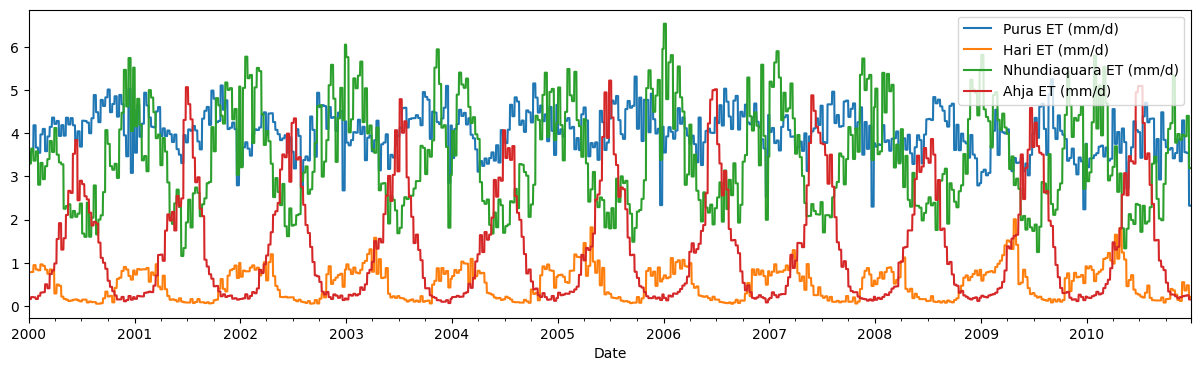

In [23]:
# View evapotranspiration data (daily data) (2015-2020)
modis_ET_day['2000':'2010'].plot(figsize=(15,4))

<Axes: xlabel='Date'>

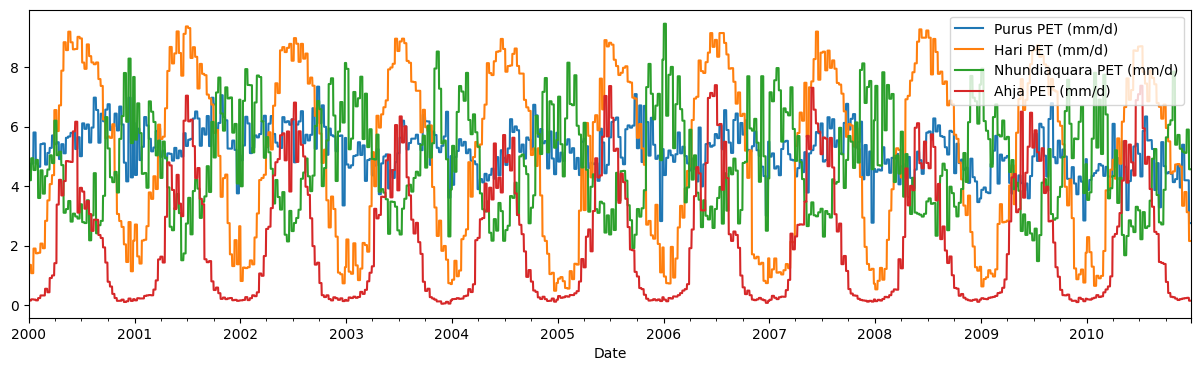

In [24]:
# View pot. evapotranspiration data (daily data) (2015-2020)
modis_PET_day['2000':'2010'].plot(figsize=(15,4))

# Smoothing time series in Pandas

To make time series data more smooth in Pandas, we can use the exponentially weighted window functions and calculate the exponentially weighted average.

* The function `pd.DataFrame.ewm?` provides exponentially weighted (EW) calculations.


In [25]:
pd.DataFrame.ewm?

In [26]:
# Suavisando os dados
modis_ET_day_smoothed  = modis_ET_day.ewm(span = 4).mean()
modis_PET_day_smoothed = modis_PET_day.ewm(span = 4).mean()

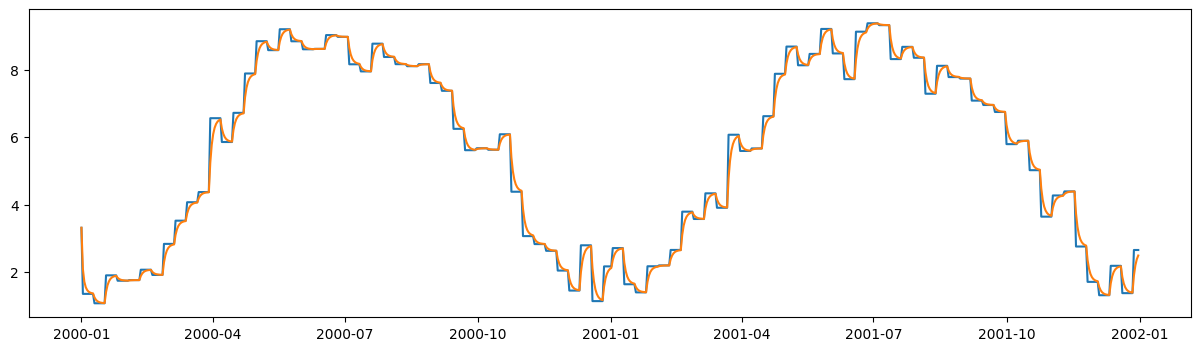

In [28]:
plt.figure(figsize=(15,4))
plt.plot(modis_PET_day['2000':'2001']['Hari PET (mm/d)'])
plt.plot(modis_PET_day_smoothed['2000':'2001']['Hari PET (mm/d)'])
plt.show();

## Save data to 2 CSV files

If you want to use it in another project, save it to the computer. If you don't save it the Colab will delete it from the cloud once you have disconected from this virtual machine.

In [29]:
modis_PET_day_smoothed.to_csv('modis_PET_daily.csv')
modis_ET_day_smoothed.to_csv('modis_ET_daily.csv')

# Let's make total anual evapotranspiration comparison

* How is the Evapotranspiration changing during last 20 years in the 3 locations?

In [31]:
# Let's see only the actual evapotranspiration, sum it anually
modis_ET_year = modis_ET_day.resample('YE').sum()

In [32]:
modis_ET_year

,Purus ET (mm/d),Hari ET (mm/d),Nhundiaquara ET (mm/d),Ahja ET (mm/d)
Date,,,,
2000-12-31,1540.125000,158.816070,1137.521505,436.018376
2001-12-31,1515.990625,149.807276,1245.210038,497.177880
2002-12-31,1452.056250,178.129608,1342.281131,507.356582
2003-12-31,1487.837500,203.641750,1301.304122,484.197420
2004-12-31,1491.209375,176.026495,1244.508712,472.351169
2005-12-31,1527.056250,216.364132,1229.170006,534.630161
2006-12-31,1510.137500,171.490127,1271.865597,499.101695
2007-12-31,1491.371875,183.456199,1343.199065,533.301492
2008-12-31,1432.762500,160.272327,1218.732268,477.936624


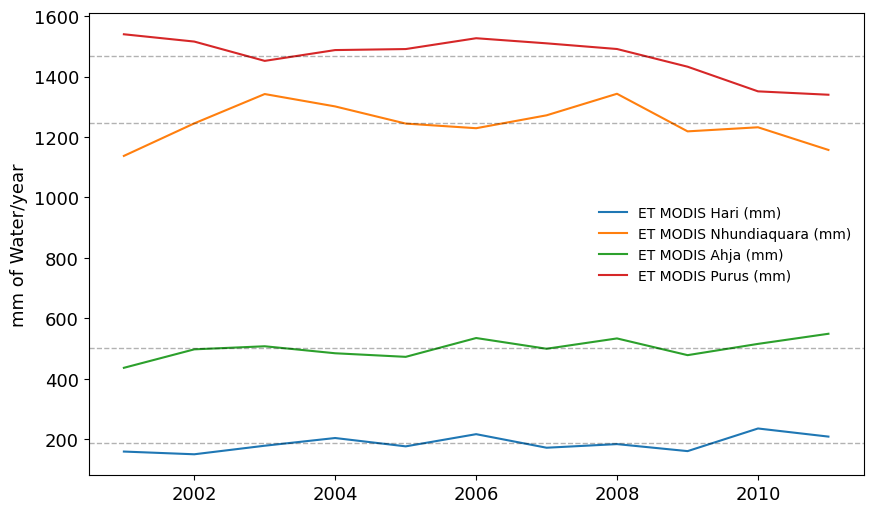

In [33]:
plt.figure(figsize=(10,6))
plt.plot(modis_ET_year['Hari ET (mm/d)'], label='ET MODIS Hari (mm)')
plt.plot(modis_ET_year['Nhundiaquara ET (mm/d)'], label='ET MODIS Nhundiaquara (mm)')
plt.plot(modis_ET_year['Ahja ET (mm/d)'], label='ET MODIS Ahja (mm)')
plt.plot(modis_ET_year['Purus ET (mm/d)'], label='ET MODIS Purus (mm)')

# specifying horizontal line (at the mean value)
plt.axhline(y = modis_ET_year['Hari ET (mm/d)'].mean(), color = 'black', linestyle = '--',linewidth=1.0,alpha=0.3)
plt.axhline(y = modis_ET_year['Nhundiaquara ET (mm/d)'].mean(), color = 'black', linestyle = '--',linewidth=1.0,alpha=0.3)
plt.axhline(y = modis_ET_year['Ahja ET (mm/d)'].mean(), color = 'black', linestyle = '--',linewidth=1.0,alpha=0.3)
plt.axhline(y = modis_ET_year['Purus ET (mm/d)'].mean(), color = 'black', linestyle = '--',linewidth=1.0,alpha=0.3)

plt.ylabel('mm of Water/year', fontsize=13) #y label
plt.tick_params(axis='both', labelsize=13) #increase font size for ticks
plt.legend(frameon=False,fontsize=10)
#plt.savefig('graficos/PET_e_ET.png', dpi = 300)
plt.show();

## Comparação com o modelo GLEAM (base CABra)



In [34]:
# Baixa dados da base CABra
!gdown 16Ey3eavHOkWiU7g5xpG1g8Mq87vuFsh4

Downloading...
From: https://drive.google.com/uc?id=16Ey3eavHOkWiU7g5xpG1g8Mq87vuFsh4
To: /content/CABra_1_climate+streamflow_edit.csv
100% 904k/904k [00:00<00:00, 93.1MB/s]


In [35]:
# leitura dos dados com pandas
df_cabra = pd.read_csv('CABra_1_climate+streamflow_edit.csv')
df_cabra['data'] = pd.to_datetime(df_cabra['data'])
df_cabra = df_cabra.set_index('data')
df_cabra

,p_ens(mm),tmin_ens(oC),tmax_ens(oC),rh_ens(%),wnd_ens(m/s),srad_ens(MJm-2),et_ens(mm),pet_pm(mm),pet_pt(mm),pet_hg(mm),Streamflow(m3/s)
data,,,,,,,,,,,
1980-10-01,4.669,22.521,31.019,85.222,0.694,17.078,3.777,4.381,5.276,4.199,1165.800
1980-10-02,11.884,22.645,31.321,82.020,0.760,15.329,4.022,4.040,4.781,3.780,1181.200
1980-10-03,9.195,22.308,30.400,86.096,0.615,15.450,4.173,3.985,4.791,3.761,1194.400
1980-10-04,9.348,21.887,30.540,85.902,0.691,15.414,3.898,4.003,4.778,3.745,1201.000
1980-10-05,14.407,19.680,26.941,88.454,1.502,11.080,2.477,3.103,3.475,2.521,1203.200
...,...,...,...,...,...,...,...,...,...,...,...
2010-09-26,1.146,23.299,34.851,71.702,1.472,21.459,3.495,5.956,6.675,5.541,938.606
2010-09-27,0.545,22.975,35.614,68.785,1.633,23.953,3.689,6.683,7.431,6.214,933.871
2010-09-28,0.289,24.676,36.276,63.917,1.830,23.573,3.364,6.664,7.406,6.268,931.509


In [36]:
evap_GLEAM = df_cabra['et_ens(mm)']['2000':'2010']

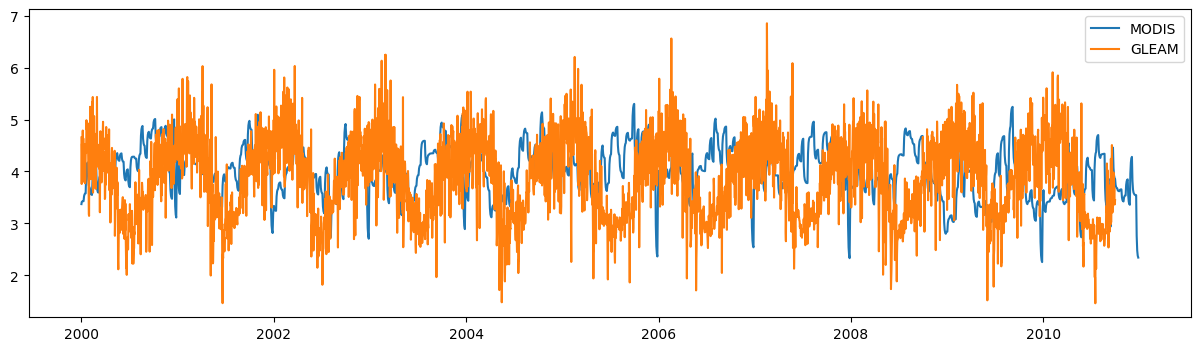

In [37]:
plt.figure(figsize=(15,4))
plt.plot(modis_ET_day_smoothed['Purus ET (mm/d)'],label='MODIS')
plt.plot(evap_GLEAM,label='GLEAM')
plt.legend()
plt.show();

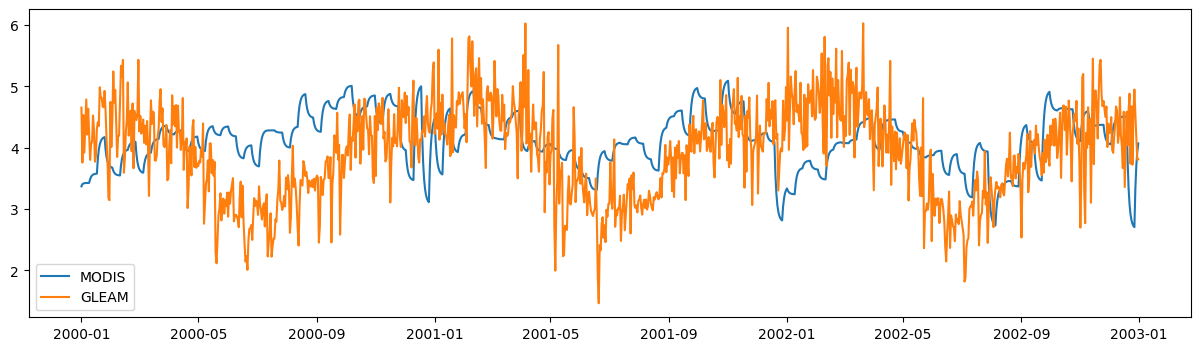

In [38]:
plt.figure(figsize=(15,4))
plt.plot(modis_ET_day_smoothed['2000':'2002']['Purus ET (mm/d)'],label='MODIS')
plt.plot(evap_GLEAM['2000':'2002'],label='GLEAM')
plt.legend()
plt.show();

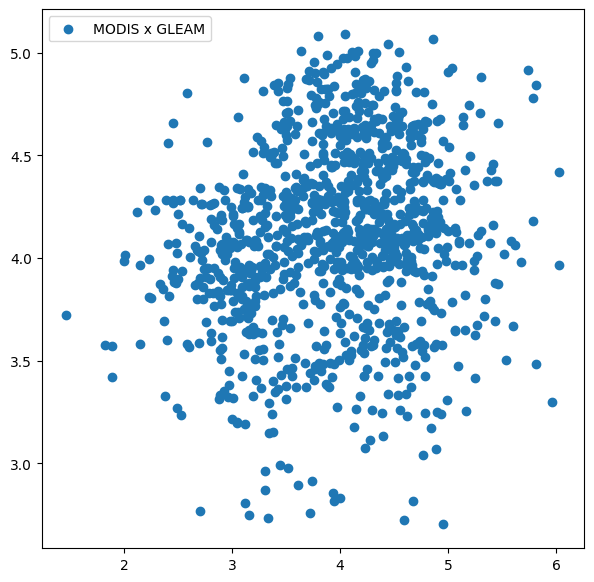

In [39]:
plt.figure(figsize=(7,7))
plt.scatter(evap_GLEAM['2000':'2002'].values,modis_ET_day_smoothed['2000':'2002']['Purus ET (mm/d)'].values,label='MODIS x GLEAM')
plt.legend()
plt.show();

## Comparing monthly acumutated evapotranspiration (MODIS x GLEAM)

In [42]:
# Let's see only the actual evapotranspiration, sum it anually
modis_ET_month = modis_ET_day.resample('ME').sum()

In [44]:
evap_GLEAM_month = evap_GLEAM.resample('ME').sum()

In [46]:
#evap_GLEAM_month

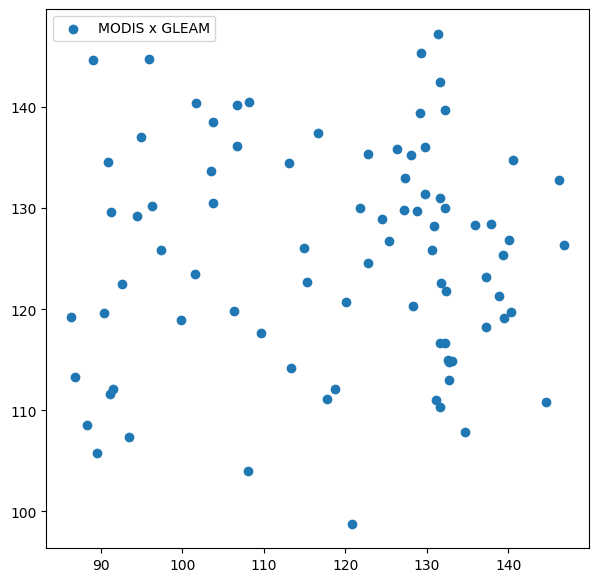

In [48]:
plt.figure(figsize=(7,7))
plt.scatter(evap_GLEAM_month['2000':'2006'].values,modis_ET_month['2000':'2006']['Purus ET (mm/d)'].values,label='MODIS x GLEAM')
plt.legend()
plt.show();